# Poisson discrete count model for MTurk demographics

In [1]:
%matplotlib inline
import pandas as pd
df = pd.DataFrame.from_csv("mturk_surveys.csv",index_col=None)
df.gender[df.gender=='Female']='female'
df.head()

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Unnamed: 0,gender,hit_answered_date,hit_creation_date,household_income,household_size,location_city,location_country,location_region,marital_status,post_to_completion_secs,worker_id,year_of_birth
0,0,female,2016-09-14 17:37:11.297,2016-09-14 17:35:14.000,"$40,000-$59,999",1,mount holly,US,nj,divorced,117.0,a013d8ba79229f477b5b045bf35c7d57,1956
1,1,male,2016-09-14 17:29:09.539,2016-09-14 17:20:14.000,"Less than $10,000",2,pune,IN,mh,single,535.0,4958cd4059bd09a144c2698d50f5bc60,1992
2,2,female,2016-09-14 17:13:35.428,2016-09-14 16:20:14.000,"Less than $10,000",4,caracas,VE,a,divorced,3201.0,0a79a3e3ea28284e7a92ce0ddaa05e06,1978
3,3,female,2016-09-14 17:10:54.723,2016-09-14 17:05:13.000,"$75,000-$99,999",3,scottsdale,US,az,cohabitating,341.0,1079d94e2374ade52af1de09232c9797,1963
4,4,male,2016-09-14 16:52:20.792,2016-09-14 16:50:13.000,"Less than $10,000",4,ambala,IN,hr,single,127.0,897b71b78803b47bc19d0d31ff91856e,1993


In [2]:
# By grouping by the informations, count the number of times each user working on the MTurk

df1 = df.groupby(['worker_id','gender','household_income','marital_status','household_size',
                  'location_city','location_country','location_region','year_of_birth']).size().sort_values()
df1=df1.reset_index()
df1.columns= ['worker_id','gender','household_income','marital_status','household_size',
              'location_city','location_country','location_region','year_of_birth','number_of_times']
df1.head()

,worker_id,gender,household_income,marital_status,household_size,location_city,location_country,location_region,year_of_birth,number_of_times
0,0000ceeb6c91d4a1a53fec0de0cc3460,female,"$25,000-$39,999",single,1,winston-salem,US,nc,1987,1
1,a35597e4ed1b898d00bea5c74086c64c,female,"Less than $10,000",married,1,bangalore,IN,ka,1987,1
2,a354d80af82fef0d09a18f7124c495e9,male,"$25,000-$39,999",engaged,4,new delhi,IN,dl,1985,1
3,a354d80af82fef0d09a18f7124c495e9,male,"$10,000-$14,999",single,4,new delhi,IN,dl,1985,1
4,a354060748901d785c4720e156553e31,male,"$25,000-$39,999",single,2,cleveland,US,oh,1975,1


In [3]:
# Through preprocessing, encode the categorical strings into categorical number 

from sklearn import preprocessing as pr
g = pd.DataFrame(pr.LabelEncoder().fit_transform(df1.gender))
hi = pd.DataFrame(pr.LabelEncoder().fit_transform(df1.household_income))
ms = pd.DataFrame(pr.LabelEncoder().fit_transform(df1.marital_status))
hs = pd.DataFrame(pr.LabelEncoder().fit_transform(df1.household_size))
lci = pd.DataFrame(pr.LabelEncoder().fit_transform(df1.location_city))
lc = pd.DataFrame(pr.LabelEncoder().fit_transform(df1.location_country))
lr = pd.DataFrame(pr.LabelEncoder().fit_transform(df1.location_region))
enc = pd.concat([g,hi,ms,hs,lci,lc,lr],axis=1)
enc.columns = ['gender','household_income','marital_status','household_size','location_city','location_country','location_region']
enc.head()

,gender,household_income,marital_status,household_size,location_city,location_country,location_region
0,0,3,6,0,4536,125,221
1,0,7,4,0,235,59,174
2,1,3,3,3,2792,59,122
3,1,0,6,3,2792,59,122
4,1,3,6,1,829,125,244


In [4]:
# Running Poisson regression based on all categorical data

from statsmodels.discrete.discrete_model import Poisson
ps_gender = Poisson(df1.number_of_times,enc).fit()
ps_gender.summary()

Optimization terminated successfully.
         Current function value: 1.312981
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:        number_of_times   No. Observations:                39519
Model:                        Poisson   Df Residuals:                    39512
Method:                           MLE   Df Model:                            6
Date:                Wed, 19 Oct 2016   Pseudo R-squ.:              -0.0006779
Time:                        20:45:27   Log-Likelihood:                -51888.
converged:                       True   LL-Null:                       -51853.
                                        LLR p-value:                     1.000
====================================================================================
                       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
gender              -0.0017      0.009     -0.192      0.847        -0.019     0.016
household_income     0.0171      0.002      8.608      0.000         0.013     0.021
marital_status       0.0136      0.002      5.604      0.000         0.009     0.018
household_size       0.0133      0.003      4.173      0.000         0.007     0.019
location_city    -1.951e-06   3.24e-06     -0.601      0.548     -8.31e-06  4.41e-06
location_country     0.0008      0.000      6.625      0.000         0.001     0.001
location_region      0.0002   4.79e-05      5.136      0.000         0.000     0.000
====================================================================================
"""

If we set our alpha level at 0.05, only "gender" and "location_city" would fail to reject the null hypothesis and conclude that the Coef. is not statistically different from zero, which illustrate that it barely has bias on "gender" and "location_city".
However, for the other variables ("household_income","marital_status","household_size","location_country","location_region"), they all shows statistically significant coef. to the "number of times" user participated in the work. 

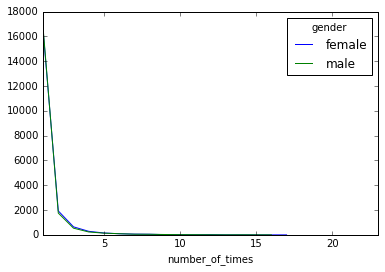

In [5]:
# Some comparison plot

df_g = df1.groupby(['number_of_times','gender']).size()
df_g.unstack('gender').plot()

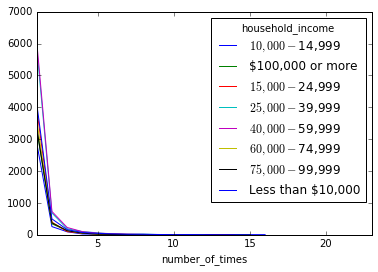

In [6]:
df_g = df1.groupby(['number_of_times','household_income']).size()
df_g.unstack('household_income').plot()

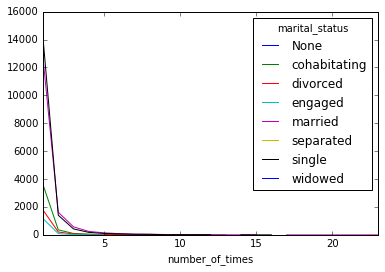

In [7]:
df_g = df1.groupby(['number_of_times','marital_status']).size()
df_g.unstack('marital_status').plot()

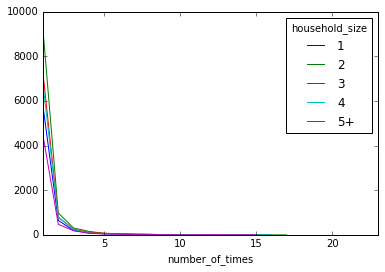

In [8]:
df_g = df1.groupby(['number_of_times','household_size']).size()
df_g.unstack('household_size').plot()